In [1]:
import matplotlib.pyplot as plt
import glob
import re
import os
import random

In [2]:
all_path = glob.glob(r'data/data_preprocess/images/val/*.jpg')
orig_path = []
prepro_path = []
for path in all_path:
    if re.search(r'prepro_', path):
        prepro_path.append(path)
    else:
        orig_path.append(path)

In [3]:
print(len(all_path))
print(len(orig_path))
print(len(prepro_path))

8897
4898
3999


In [4]:
all_path_labels = glob.glob(r'data/data_preprocess/labels/val/*.txt')
orig_path_labels = []
prepro_path_labels = []
for path in all_path_labels:
    if re.search(r'prepro_', path):
        prepro_path_labels.append(path)
    else:
        orig_path_labels.append(path)

In [5]:
print(len(all_path_labels))
print(len(orig_path_labels))
print(len(prepro_path_labels))

4444
2445
1999


In [6]:
import cv2
def read_bounding_boxes(file_path):
    bounding_boxes = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            if len(parts) == 5:
                label = int(parts[0])  # Assuming the label is an integer
                x_center = float(parts[1])
                y_center = float(parts[2])
                width = float(parts[3])
                height = float(parts[4])
                bounding_boxes.append([label, x_center, y_center, width, height])
    return bounding_boxes

def write_bboxes(image_path, bboxes_path, path=True, plot = True):

    # Load your image
    if path:
      image = cv2.imread(image_path)
      # Load the bounding boxes
      bounding_boxes = read_bounding_boxes(bboxes_path)
    else:
      image = image_path
      bounding_boxes = bboxes_path

    # Image dimensions
    height, width, _ = image.shape

    # Iterate through the bounding boxes and draw them on the image
    for box in bounding_boxes:
        label, x_center, y_center, w, h = box
        x1 = int((x_center - w / 2) * width)
        y1 = int((y_center - h / 2) * height)
        x2 = int((x_center + w / 2) * width)
        y2 = int((y_center + h / 2) * height)
        
        color = (0, 255, 0)  # BGR color for the bounding box (green in this case)
        thickness = 2  # Thickness of the bounding box lines
        cv2.rectangle(image, (x1, y1), (x2, y2), color, thickness)
        
        text = f'{label}'
        cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, thickness)

    if plot:
        # Display the image with bounding boxes using matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')  # Hide axis
        plt.show()
    else:
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
def random_plot():
    random_orig_path = random.choice(orig_path)
    if 'data/data_preprocess/images/val/' + 'prepro_' + random_orig_path.split('/')[-1] in prepro_path:
        # orig_img = plt.imread(random_orig_path)
        # prepro_img = plt.imread('data/data_preprocess/images/val/' + 'prepro_' + random_orig_path.split('/')[-1])

        if 'data/data_preprocess/labels/val/' + random_orig_path.split('/')[-1][:-4] + '.txt' in orig_path_labels:
            bboxes_path = 'data/data_preprocess/labels/val/' + random_orig_path.split('/')[-1][:-4] + '.txt'
            prepro_bboxes_path = 'data/data_preprocess/labels/val/' + 'prepro_' + random_orig_path.split('/')[-1][:-4] + '.txt'
            orig_img = write_bboxes(random_orig_path, bboxes_path, plot = False)
            prepro_img = write_bboxes('data/data_preprocess/images/val/' + 'prepro_' + random_orig_path.split('/')[-1], prepro_bboxes_path, plot = False)
        else:
            orig_img = plt.imread(random_orig_path)
            prepro_img = plt.imread('data/data_preprocess/images/val/' + 'prepro_' + random_orig_path.split('/')[-1])
            
        # Create a figure with 2 subplots
        fig, (ax1, ax2) = plt.subplots(1, 2)
        
        # Display images in subplots
        ax1.imshow(orig_img)
        ax2.imshow(prepro_img)
        
        # Optional: Add titles and adjust layout
        ax1.set_title('Origin image')
        ax2.set_title('Add_noise image')
        # fig.suptitle('Two Images')
        plt.tight_layout()
        
        # Display the plot
        plt.show()
        return 'complete'
    else:
        return 'try again'

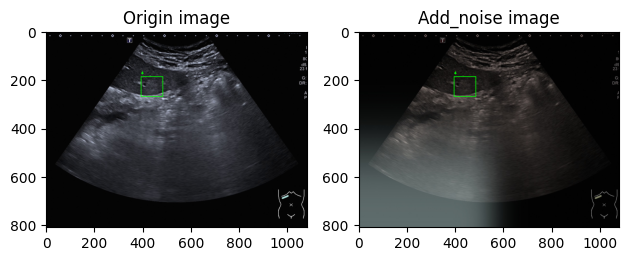

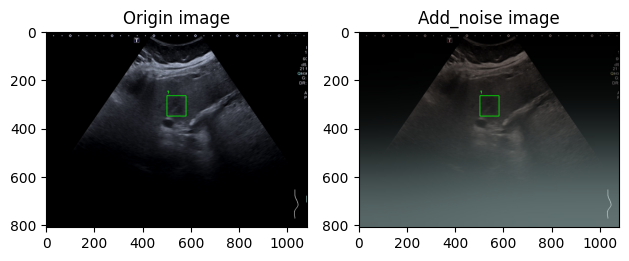

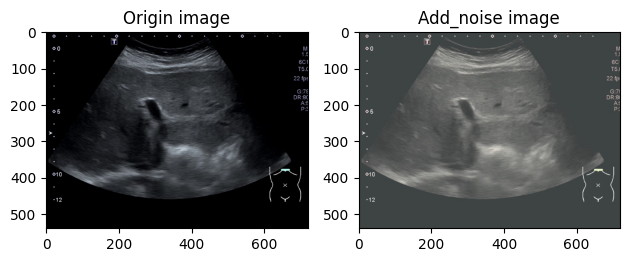

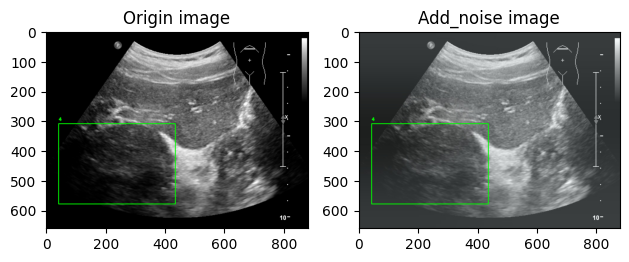

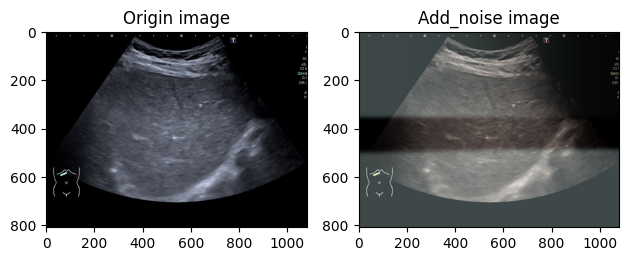

In [18]:
for i in range(5):
    resp = random_plot()
    while resp == 'try again':
        resp = random_plot()

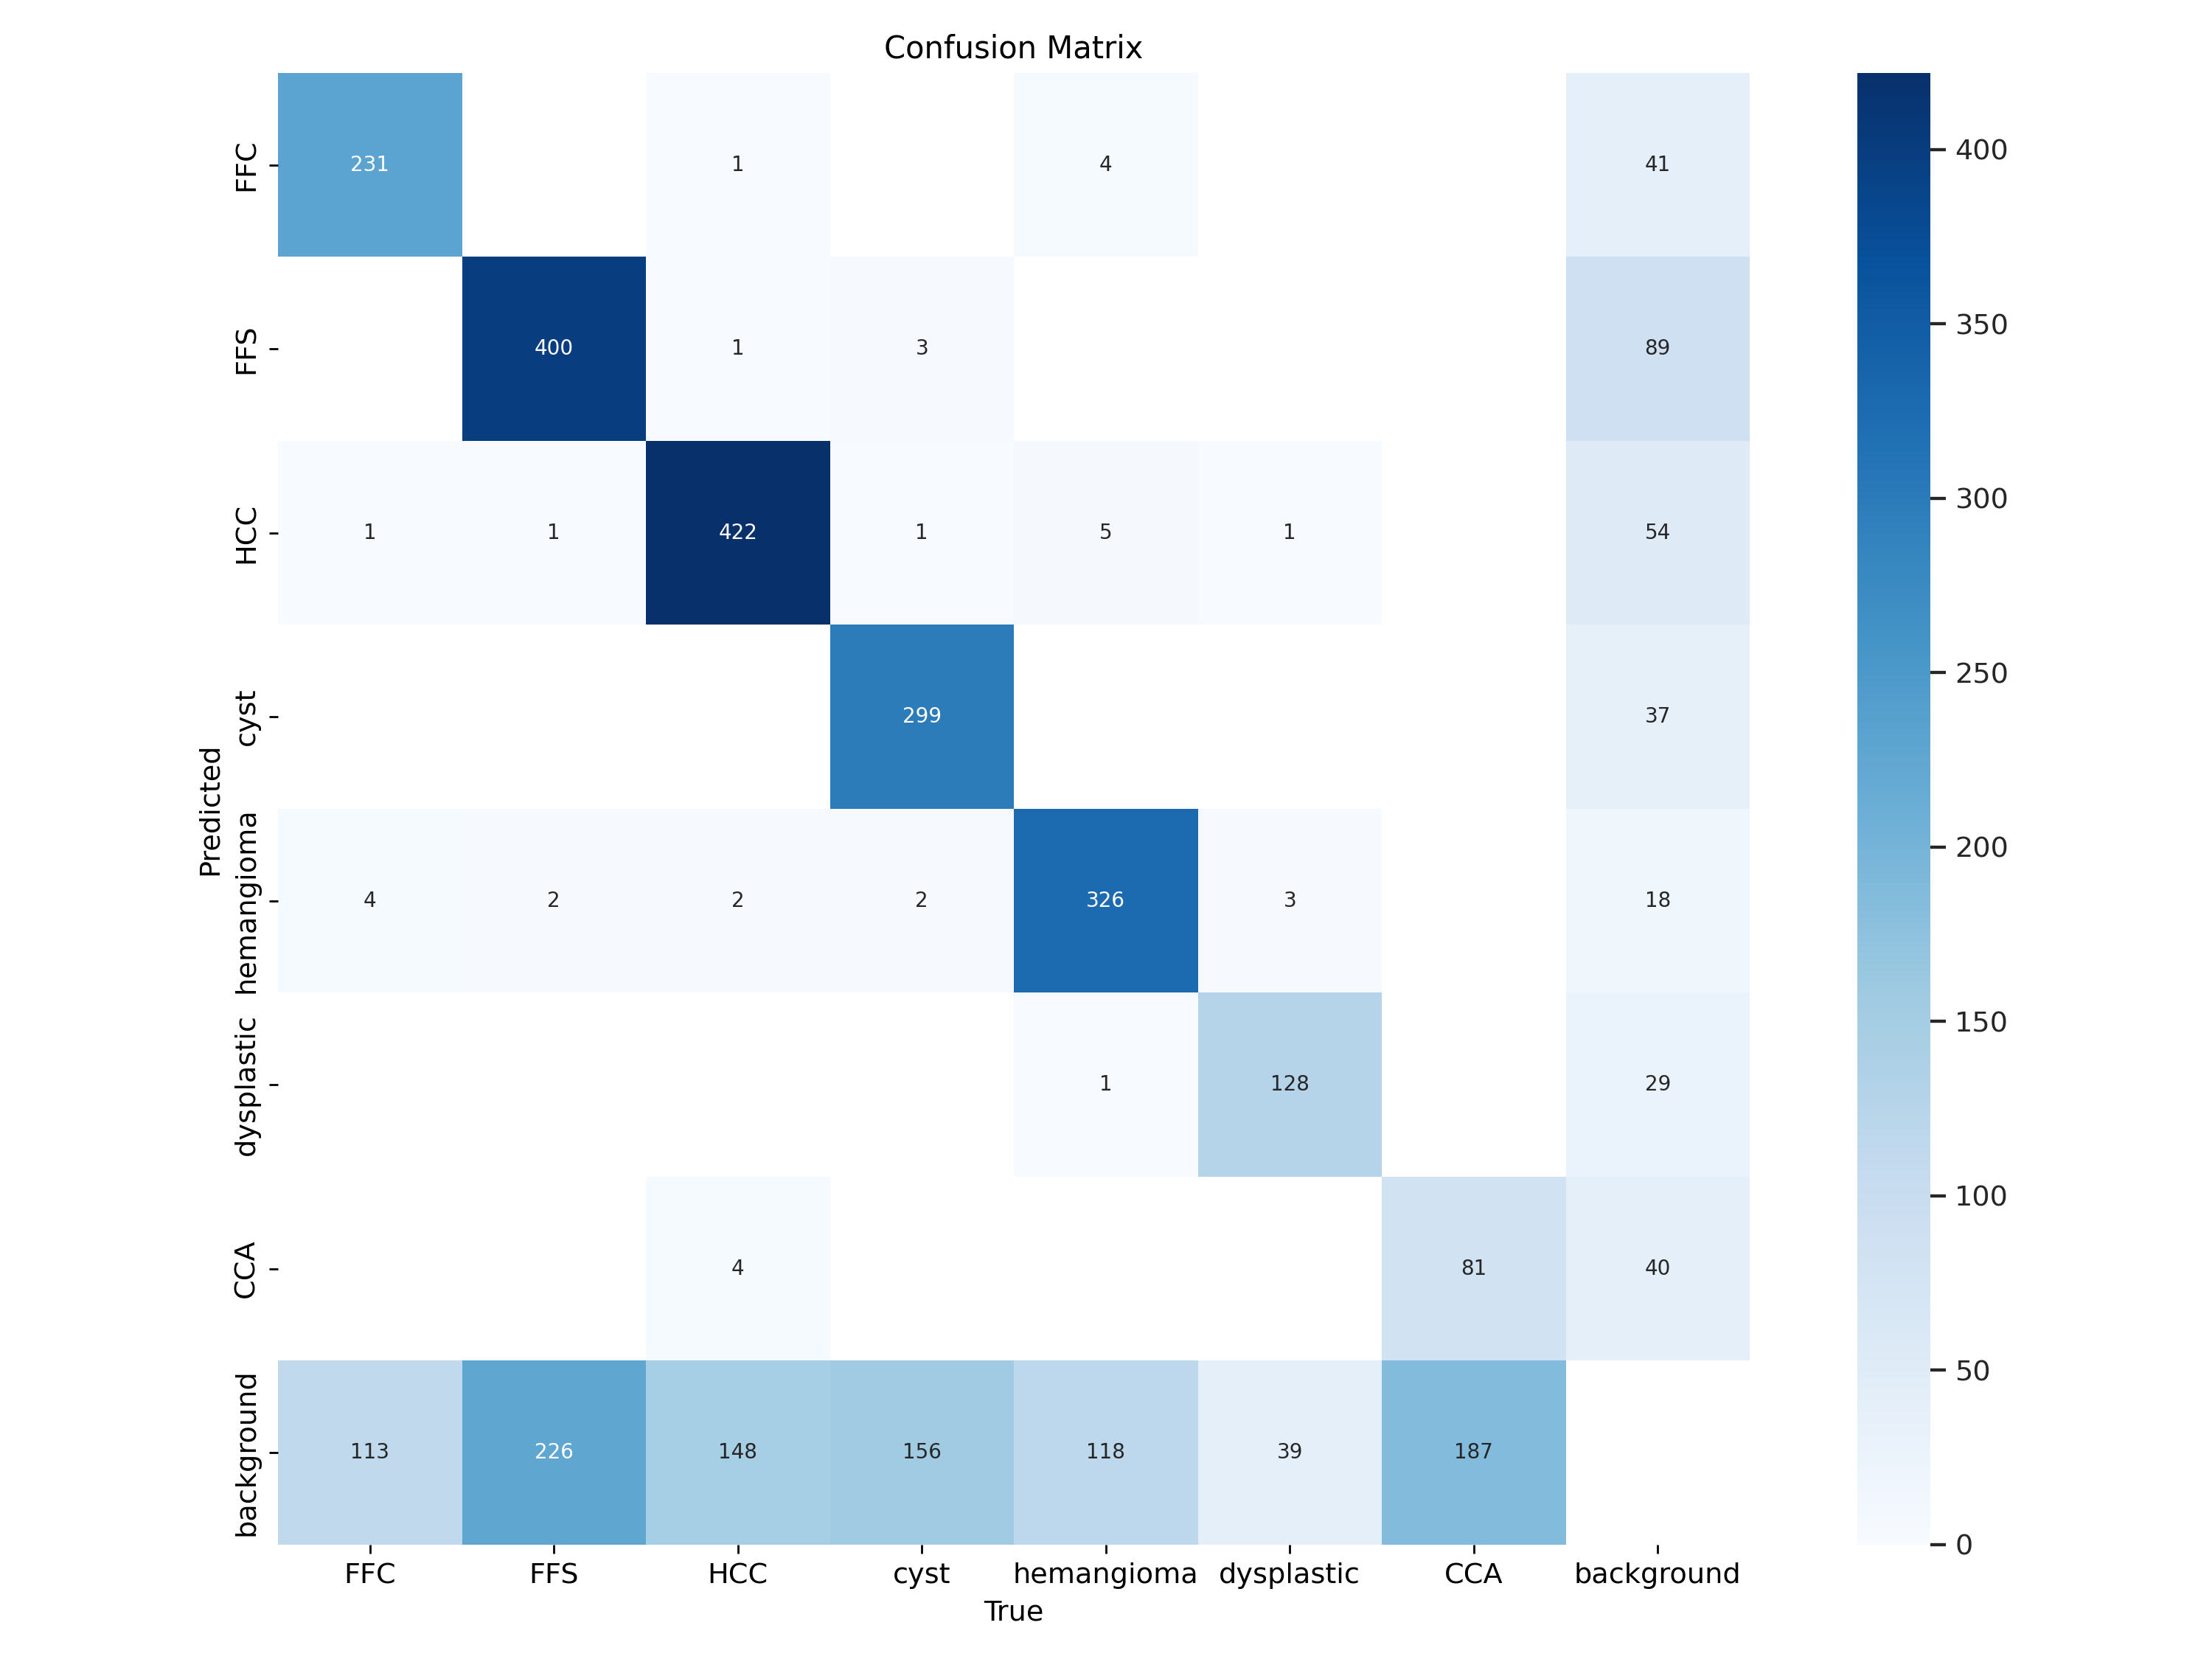

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

# Replace 'image.jpg' with your actual image path
image_path = 'runs_yoloV9e/detect/val4/confusion_matrix.png'

# Load the image using Pillow
img = Image.open(image_path)

# Convert the image to a format suitable for Matplotlib (RGBA)
img_rgb = img.convert('RGB')

img_rgb

In [ ]:
# df_mapping = pd.read_excel('oridata/mapping.xlsx')
# df_mapping

# from pathlib import Path
# import shutil
# from tqdm import tqdm

# sourdirimage = "data/liver-ultrasound-detection-unzip/images/train"
# sourdirlabel = "data/liver-ultrasound-detection-unzip/labels/train"
# sourdirimageval = "data/liver-ultrasound-detection-unzip/images/val"
# sourdirlabelval = "data/liver-ultrasound-detection-unzip/labels/val"

# savedirimage = "datasets/mobile/train/images/"
# savedirlabel = "datasets/mobile/train/labels/"
# savedirimageval = "datasets/mobile/val/images/"
# savedirlabelval = "datasets/mobile/val/labels/"

# Path(savedirimage).mkdir(parents=True, exist_ok=True)
# Path(savedirlabel).mkdir(parents=True, exist_ok=True)
# Path(savedirimageval).mkdir(parents=True, exist_ok=True)
# Path(savedirlabelval).mkdir(parents=True, exist_ok=True)

# for index, row in tqdm(df_mapping[df_mapping.Source=='mobile'].iterrows()):
#     if os.path.exists(sourdirimage + row['Image File']): 
#         shutil.copyfile(sourdirimage + row['Image File'], savedirimage + row['Image File'])

#         if not pd.isna(row['Annotation File']):
#             shutil.copyfile(sourdirlabel + row['Annotation File'], savedirlabel + row['Annotation File'])
#     else:
#         shutil.copyfile(sourdirimageval + row['Image File'], savedirimageval + row['Image File'])
#         if not pd.isna(row['Annotation File']):
#             shutil.copyfile(sourdirlabelval + row['Annotation File'], savedirlabelval + row['Annotation File'])
# sourdirimage = "datasets/train/images/"
# sourdirlabel = "datasets/train/labels/"
# sourdirimageval = "datasets/val/images/"
# sourdirlabelval = "datasets/val/labels/"
# savedirimage = "datasets/machine/train/images/"
# savedirlabel = "datasets/machine/train/labels/"
# savedirimageval = "datasets/machine/val/images/"
# savedirlabelval = "datasets/machine/val/labels/"

# Path(savedirimage).mkdir(parents=True, exist_ok=True)
# Path(savedirlabel).mkdir(parents=True, exist_ok=True)
# Path(savedirimageval).mkdir(parents=True, exist_ok=True)
# Path(savedirlabelval).mkdir(parents=True, exist_ok=True)

# for index, row in tqdm(df_mapping[df_mapping.Source!='mobile'].iterrows()):
#     if os.path.exists(sourdirimage + row['Image File']): 
#         shutil.copyfile(sourdirimage + row['Image File'], savedirimage + row['Image File'])

#         if not pd.isna(row['Annotation File']):
#             shutil.copyfile(sourdirlabel + row['Annotation File'], savedirlabel + row['Annotation File'])
#     else:
#         shutil.copyfile(sourdirimageval + row['Image File'], savedirimageval + row['Image File'])
#         if not pd.isna(row['Annotation File']):
#             shutil.copyfile(sourdirlabelval + row['Annotation File'], savedirlabelval + row['Annotation File'])

In [ ]:
# Define the data to be written to the YAML file
data = {
    'path': '',
    'train': 'mobile/train',
    'val': 'mobile/val',
    'names': {
        0: 'FFC',
        1: 'FFS',
        2: 'HCC',
        3: 'cyst',
        4: 'hemangioma',
        5: 'dysplastic',
        6: 'CCA'
    }
}

# Write the data to a YAML file
with open('datasetmobile.yml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False, sort_keys=False)

print("YAML file written successfully.")

In [26]:
import pandas as pd
mapping = pd.read_excel('data/liver-ultrasound-detection-unzip/mapping.xlsx')
mapping

,Image File,Annotation File,Source,Type
0,24084.jpg,24084.txt,machine,machine_positive
1,97528.jpg,97528.txt,machine,machine_positive
2,54563.jpg,54563.txt,machine,machine_positive
3,115211.jpg,115211.txt,machine,machine_positive
4,71913.jpg,71913.txt,machine,machine_positive
...,...,...,...,...
19341,1160.jpg,NaN,mobile,mobile_negative
19342,153.jpg,NaN,mobile,mobile_negative
19343,130705.jpg,NaN,mobile,mobile_negative
19344,812.jpg,NaN,mobile,mobile_negative


In [80]:
from tqdm import tqdm
num_class_train = {}
num_class_val = {}
num_object_train = {}
num_object_val = {}
for i in range(7):
    num_class_train[str(i)] = 0
    num_class_val[str(i)] = 0

for folder in ['val', 'train']:
    for txt in tqdm(os.listdir('data/liver-ultrasound-detection-unzip/labels/' + folder)):
        if txt[-4:] == '.txt':
            with open('data/liver-ultrasound-detection-unzip/labels/' + folder + '/' + txt, 'r') as file:
                # Read the contents of the file
                contents = file.read()
                contents_split = []
                for i in contents.split('\n'):
                    if i != '':
                        contents_split.append(i)

                if folder == 'train':
                    contents_split = [i.split() for i in contents_split]
                    for i in contents_split:
                        num_class_train[i[0]] += 1
                    if str(len(contents_split)) in num_object_train.keys():
                        num_object_train[str(len(contents_split))] += 1
                    else:
                        num_object_train[str(len(contents_split))] = 1
                else:
                    contents_split = [i.split() for i in contents_split]
                    for i in contents_split:
                        num_class_val[i[0]] += 1
                    if str(len(contents_split)) in num_object_val.keys():
                        num_object_val[str(len(contents_split))] += 1
                    else:
                        num_object_val[str(len(contents_split))] = 1

100%|██████████| 7222/7222 [00:02<00:00, 3401.38it/s]


In [70]:
num_class_train

{'0': 962, '1': 1806, '2': 1740, '3': 1358, '4': 1342, '5': 626, '6': 875}

In [81]:
num_object_train

{'1': 6437,
 '2': 582,
 '3': 98,
 '4': 31,
 '6': 9,
 '14': 5,
 '13': 6,
 '5': 22,
 '12': 3,
 '16': 2,
 '8': 4,
 '15': 3,
 '9': 4,
 '10': 3,
 '11': 2,
 '7': 7,
 '22': 2,
 '27': 1,
 '25': 1}

In [86]:
num_object_val

{'2': 183,
 '1': 2207,
 '3': 23,
 '9': 4,
 '4': 7,
 '13': 1,
 '8': 4,
 '12': 3,
 '5': 6,
 '15': 1,
 '20': 2,
 '6': 1,
 '14': 1,
 '11': 1,
 '7': 1}

In [71]:
sum(num_class_train.values())

8709

In [72]:
import glob

In [73]:
len(glob.glob('data/liver-ultrasound-detection-unzip/labels/train/*.txt')) + len(glob.glob('data/liver-ultrasound-detection-unzip/labels/val/*.txt'))

9667

Text(0.5, 1.0, 'train')

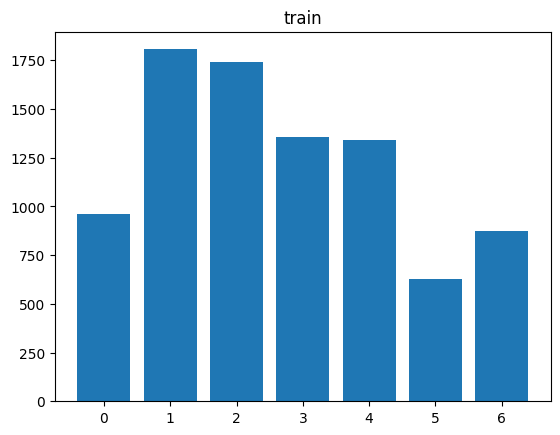

In [76]:
plt.bar(range(7), num_class_train.values())
plt.title('train')

Text(0.5, 1.0, 'val')

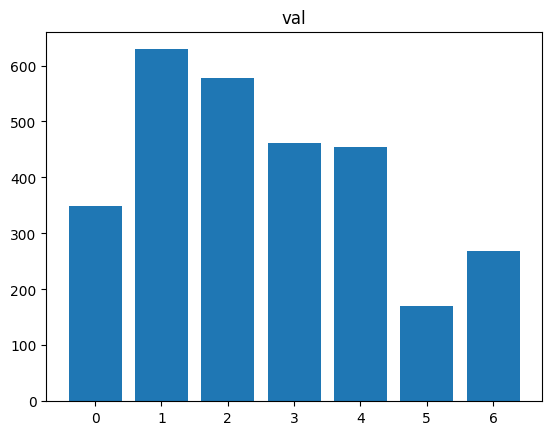

In [77]:
plt.bar(range(7), num_class_val.values())
plt.title('val')

Text(0.5, 1.0, 'train')

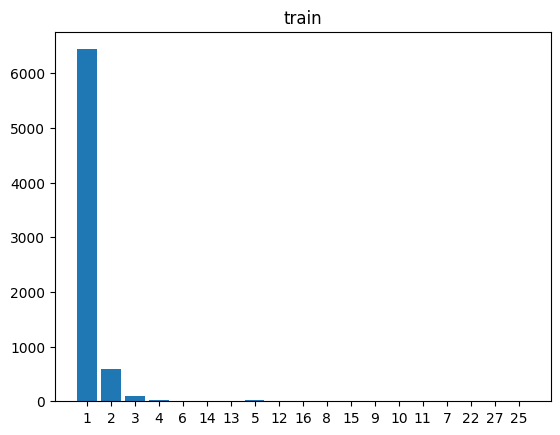

In [85]:
plt.bar(num_object_train.keys(), num_object_train.values())
plt.title('train')

In [84]:
range(1, len(num_object_train) + 1)

range(1, 20)